In [1]:
%matplotlib inline
from ecell4 import *

In [2]:
with species_attributes():
    A | B | C | {"D": "1", "radius": "0.005"}

with reaction_rules():
    A + B == C | (0.01, 0.3)

m = get_model()

In [3]:
# factory = egfrd.EGFRDFactory(Integer3(4, 4, 4))
factory = spatiocyte.SpatiocyteFactory(0.005)

In [4]:
w = factory.create_world(Real3(1, 1, 1))
w.bind_to(m)

In [5]:
w.add_molecules(Species("A"), 60, AABB(Real3(0, 0, 0), Real3(0.5, 1, 1)))
w.add_molecules(Species("B"), 60, AABB(Real3(0.5, 0, 0), Real3(1, 1, 1)))

In [6]:
sim = factory.create_simulator(w)
obs1 = NumberObserver(("A", "C"))
# sim.run(1.0, obs1)
obs2 = FixedIntervalHDF5Observer(0.02, "test%03d.h5")
sim.run(1.0, [obs1, obs2])

In [7]:
# viz.plot_movie([factory.create_world("test%03d.h5" % _) for _ in xrange(51)], radius=0.005, grid=False, species_list=("A", "B", "C"))

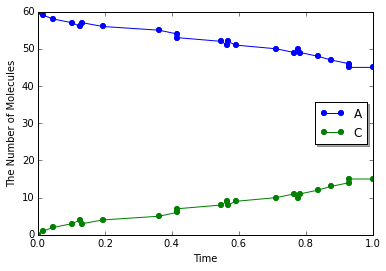

In [8]:
viz.plot_number_observer(obs1, 'o-', markeredgewidth=0)